<a href="https://colab.research.google.com/github/danlig94/data_science/blob/master/deep_learning/Tensorflow01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

np.set_printoptions(precision=12, suppress=True, linewidth=120)

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()
print(f'X_train shape {X_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_train shape {y_train.shape}')
print(f'y_test shape {y_test.shape}')

11493376/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
X_test shape (10000, 28, 28)
y_train shape (60000,)
y_test shape (10000,)


In [3]:
print(X_train[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0   0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   0   0   0   0  2

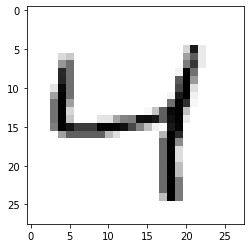

In [4]:
plt.imshow(X_train[2], cmap='Greys')

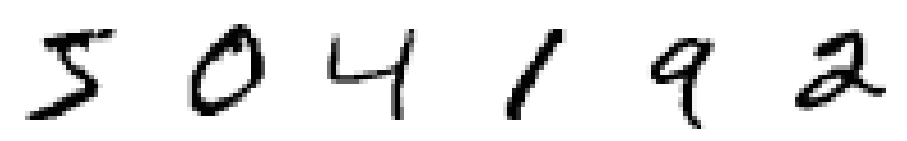

In [5]:
plt.figure(figsize=(16, 16))
for i in range(6):
  plt.subplot(1, 6, i+1)
  plt.imshow(X_train[i], cmap='Greys')
  plt.axis('OFF')

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2958 - accuracy: 0.9125
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1430 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1073 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0895 - accuracy: 0.9723
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0744 - accuracy: 0.9768


In [12]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0695 - accuracy: 0.9790


[0.06954397261142731, 0.9789999723434448]

In [15]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy
0,0.295801,0.912500
1,0.142989,0.957633
2,0.107336,0.968167
3,0.089491,0.972333
4,0.074366,0.976767


In [16]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

In [17]:
model.predict(X_test)

array([[0.0000000009  , 0.000000006998, 0.000001766187, ..., 0.9999857     , 0.000000040042, 0.00000022385 ],
       [0.000000003468, 0.000003582392, 0.999967      , ..., 0.            , 0.00000109482 , 0.            ],
       [0.000000572122, 0.9983191     , 0.00020916614 , ..., 0.0012944663  , 0.000098998906, 0.00000191043 ],
       ...,
       [0.000000000009, 0.000000000111, 0.000000000049, ..., 0.000010229022, 0.000002910635, 0.00006929892 ],
       [0.000000012854, 0.000000000099, 0.000000000314, ..., 0.000000003417, 0.00039005812 , 0.000000003367],
       [0.0000000887  , 0.            , 0.000000072126, ..., 0.000000000002, 0.000000001369, 0.000000000016]],
      dtype=float32)

In [20]:
y_pred = model.predict_classes(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [23]:
pred = pd.concat([pd.DataFrame({'y_pred': y_pred}), pd.DataFrame({'y_true': y_test})], axis=1)
pred.head()

,y_pred,y_true
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [33]:
misclassified = pred[pred['y_true'] != pred['y_pred']]
print(len(misclassified))
misclassified.index[:10]

210


Int64Index([115, 217, 247, 259, 321, 340, 445, 495, 582, 610], dtype='int64')

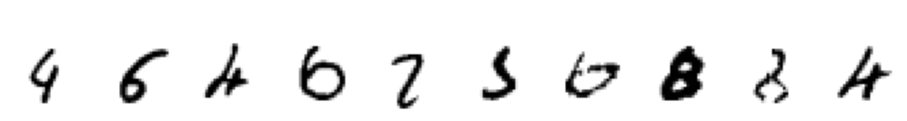

In [26]:
plt.figure(figsize=(16, 16))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title(f'y_true: {y_test[j]}\ny_pred: {y_pred[j]}', color='white', fontsize=12)
plt.show()